Importación de las librerías a necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de archivos y preview de los mismos.

In [2]:
df_disney = pd.read_csv('disney_plus_titles.csv', sep=',')
df_disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
df_netflix = pd.read_csv('netflix_titles.csv', sep=';')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


A primera vista notamos varios campos multivaluados como los son cast o listed_in, lo cual es un problema si queremos ingestar estos datos en un modelo relacional clásico.
Por otro lado, los DataFrames comparten la totalidad de sus campos, lo cual nos facilita bastante el trabajo.

# Proseguimos con un análisis más a profundidad del DataFrame de Disney Plus.

In [4]:
print(df_disney.shape)

(1450, 12)


In [5]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [6]:
df_disney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


Notamos que es un dataset conformado casi por completo por dato categórico.

In [7]:
print(df_disney.isna().sum())

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


Más del 30% de los datos del campo 'director' son nulos...

In [8]:
df_disney.iloc[df_disney.isna().sum(axis = 1).idxmax()]

show_id                                                      s281
type                                                      TV Show
title                                    Marvel Studios ASSEMBLED
director                                                      NaN
cast                                                          NaN
country                                                       NaN
date_added                                         March 12, 2021
release_year                                                 2021
rating                                                        NaN
duration                                                 1 Season
listed_in                                   Anthology, Docuseries
description     ASSEMBLED is an immersive series of docu-speci...
Name: 280, dtype: object

In [9]:
disney_na = df_disney[df_disney.isna().any(axis=1)]
disney_na.shape

(632, 12)

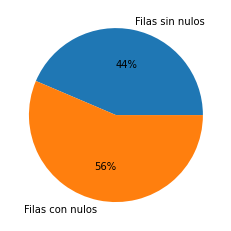

In [10]:
rows_with_nan = disney_na.shape[0]
rows_without_nan = df_disney.shape[0] - rows_with_nan
data = [rows_with_nan, rows_without_nan]
labels = ['Filas sin nulos', 'Filas con nulos']
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Más del 40% de los registros tienen al menos 1 campo nulo.

Discriminamos por el campo más significativo: el tipo.

In [11]:
print(df_disney[df_disney['type'] == 'Movie'].shape)
print(disney_na[disney_na['type'] == 'Movie'].shape)

(1052, 12)
(234, 12)


In [12]:
print(df_disney[df_disney['type'] == 'TV Show'].shape)
print(disney_na[disney_na['type'] == 'TV Show'].shape)

(398, 12)
(398, 12)


La totalidad de los registos de tipo 'TV Show' no especifican director.

In [13]:
numeric_duration = [int(string.split()[0]) for string in disney_na['duration']]
disney_na['numeric_duration'] = numeric_duration
disney_na.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12072\3134637419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_na['numeric_duration'] = numeric_duration


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numeric_duration
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,23
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,91
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",41
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,1


In [14]:
df = disney_na[disney_na['type'] == 'Movie']
print(df.describe())
print(df.numeric_duration.median())

       release_year  numeric_duration
count    234.000000        234.000000
mean    1997.158120         34.423077
std       33.366038         32.372504
min     1932.000000          1.000000
25%     1954.000000          8.000000
50%     2018.000000         24.000000
75%     2020.000000         45.000000
max     2021.000000        182.000000
24.0


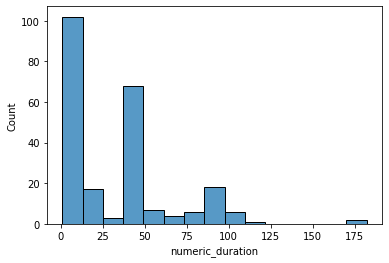

In [15]:
sns.histplot(df.numeric_duration, bins=15)
plt.show()

In [16]:
numeric_duration_all = [int(string.split()[0]) for string in df_disney['duration']]
df_disney['numeric_duration'] = numeric_duration_all

In [17]:
print(df_disney[df_disney['type'] == 'Movie'].shape)
print(df_disney[(df_disney['type'] == 'Movie') & (df_disney['numeric_duration'] <= 10)].shape)

print(df.shape)
print(df[df['numeric_duration'] <= 10].shape)

(1052, 13)
(181, 13)
(234, 13)
(99, 13)


Deducimos que Disney plus tiene listados muchos cortometrajes, anuncios, trailers y especiales cortos como películas, muchos de éstos registros tienen uno o más campos nulos.

# Hacemos lo propio con el DataFrame de Netflix.

In [18]:
print(df_netflix.shape)

(8809, 12)


In [19]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8808 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7983 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8806 non-null   object
 11  description   8806 non-null   object
dtypes: object(12)
memory usage: 826.0+ KB


Acá vemos que el campo 'release_year' no es del mismo tipo que en el otro DataFrame.

In [20]:
print(df_netflix.isna().sum())

show_id            0
type               1
title              2
director        2636
cast             826
country          833
date_added        12
release_year       2
rating             6
duration           5
listed_in          3
description        3
dtype: int64


Acá volvemos a ver el mismo patrón que en el primer df, el campo más problemático es 'director' con casi el 30% de registros nulos. Además de eso podemos encontrar unos pocos registros conflictivos en campos indispensables como 'show_id', 'type' o 'title'.

Proseguimos a arreglar los errores en esos campos para poder realizar adecuadamente el analisis descriptivo.

In [21]:
df_netflix.loc[df_netflix['type'].isna()]
#Index 8202

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8202,"and probably will.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
desc_8201 = df_netflix.loc[8201].description
print(desc_8201)

Britain's most ineffective but caring teacher takes his class to Cornwall for one last school trip, where anything could happen –


La row 8202 sale de un salto de línea de la row que la precede.

In [23]:
comp_desc_8201 = str(df_netflix.loc[8202].show_id)[:18]
print(comp_desc_8201)

 and probably will


In [24]:
desc_8201 += comp_desc_8201
print(desc_8201) 

Britain's most ineffective but caring teacher takes his class to Cornwall for one last school trip, where anything could happen – and probably will


In [25]:
df_netflix.loc[8201].description = desc_8201

In [26]:
df_netflix.drop(8202, inplace=True)

Proseguimos con la limpieza preliminar.

In [27]:
df_netflix.loc[df_netflix['title'].isna()]
#Index 8421

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8421,"Flying Fortress""",William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,NaN,NaN


In [28]:
df_netflix.loc[8420]

show_id                                   s8420
type                                      Movie
title           The Memphis Belle: A Story of a
director                                    NaN
cast                                        NaN
country                                     NaN
date_added                                  NaN
release_year                                NaN
rating                                      NaN
duration                                    NaN
listed_in                                   NaN
description                                 NaN
Name: 8420, dtype: object

Se puede apreciar que la row 8421 sale de un salto de línea inesperado en el campo 'title' de la row anterior.

In [29]:
list_8420 = (df_netflix.loc[8420]).tolist()
print(list_8420)

['s8420', 'Movie', 'The Memphis Belle: A Story of a', nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [30]:
list_8421 = (df_netflix.loc[8421]).tolist()
list_8421.insert(0, np.nan)
list_8421.insert(0, np.nan)
list_8421.pop(12)
list_8421.pop(12)
print(list_8421)

[nan, nan, 'Flying Fortress"', 'William Wyler', nan, 'United States', 'March 31, 2017', '1944', 'TV-PG', '40 min', 'Classic Movies, Documentaries', 'This documentary centers on the crew of the B-17 Flying Fortress Memphis Belle as it prepares to execute a strategic bombing mission over Germany.']


In [31]:
# full_title = list_8420[2] + ' ' + list_8421[2][:15]
full_title = df_netflix.loc[8420].title + ' ' + list_8421[2][:15]
list_8421[2] = full_title
print(list_8421)

[nan, nan, 'The Memphis Belle: A Story of a Flying Fortress', 'William Wyler', nan, 'United States', 'March 31, 2017', '1944', 'TV-PG', '40 min', 'Classic Movies, Documentaries', 'This documentary centers on the crew of the B-17 Flying Fortress Memphis Belle as it prepares to execute a strategic bombing mission over Germany.']


In [32]:
for index, item in enumerate(list_8421):
    if item is not np.nan:
        df_netflix.loc[8420][index] = item
    

Actualizamos la row.

In [33]:
df_netflix.drop(8421, inplace=True)

In [34]:
print(df_netflix.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Podemos apreciar que ya hemos resuelto los conflictos en varios campos, proseguimos con 'rating' y 'duration'.

In [35]:
df_netflix.loc[df_netflix['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Contrario a los registros anteriores este no tiene problemas de formato.

In [36]:
df_netflix.loc[df_netflix['duration'].isna()]
# Indexes 5541, 5794, 5813

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Los campos 'rating' y 'duration' están invertidos.

In [37]:
indexes = [5541, 5794, 5813]
for index in indexes:
    df_netflix.loc[index].duration = df_netflix.loc[index].rating
    df_netflix.loc[index].rating = np.nan

Con esto ya tendríamos lista nuestra normalización preliminar y estamos listos para proseguir con el análisis.

In [38]:
df_netflix = df_netflix.astype({'release_year': int}, errors='raise') 

In [39]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [40]:
netflix_na = df_netflix[df_netflix.isna().any(axis=1)]
netflix_na.shape

(3475, 12)

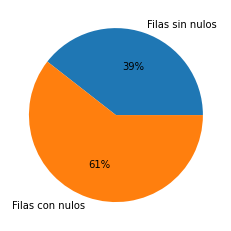

In [41]:
rows_with_nan = netflix_na.shape[0]
rows_without_nan = df_netflix.shape[0] - rows_with_nan
data = [rows_with_nan, rows_without_nan]
labels = ['Filas sin nulos', 'Filas con nulos']
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

Casi el 40% de registros tienen al menos 1 campo nulo.

Volvemos a discriminar por tipo.

In [42]:
print(df_netflix[df_netflix['type'] == 'Movie'].shape)
print(netflix_na[netflix_na['type'] == 'Movie'].shape)

(6131, 12)
(946, 12)


In [43]:
print(df_netflix[df_netflix['type'] == 'TV Show'].shape)
print(netflix_na[netflix_na['type'] == 'TV Show'].shape)

(2676, 12)
(2529, 12)


In [44]:
print(df_netflix[(df_netflix['type'] == 'TV Show') & (df_netflix.director.isna())].shape)

(2446, 12)


De 2676 registros de tipo 'TV Show' 2446 tienen el campo 'director' como nulo, es más de un 90%.

In [45]:
numeric_duration = [int(string.split()[0]) for string in netflix_na['duration']]
netflix_na['numeric_duration'] = numeric_duration
netflix_na.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12072\3766232258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_na['numeric_duration'] = numeric_duration


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numeric_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [46]:
df = netflix_na[netflix_na['type'] == 'Movie']
print(df.describe())
print(df.numeric_duration.median())

       release_year  numeric_duration
count    946.000000        946.000000
mean    2015.906977         82.374207
std        9.030215         33.819464
min     1942.000000          3.000000
25%     2016.000000         62.000000
50%     2018.000000         86.000000
75%     2020.000000        100.000000
max     2021.000000        312.000000
86.0


In [47]:
numeric_duration_all = [int(string.split()[0]) for string in df_netflix['duration']]
df_netflix['numeric_duration'] = numeric_duration_all

In [48]:
df_netflix[(df_netflix['type'] == 'Movie') & (df_netflix['numeric_duration'] < 10)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numeric_duration
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8
1557,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,G,9 min,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",9
2713,s2714,Movie,Sol Levante,Akira Saitoh,NaN,Japan,"April 2, 2020",2020,TV-14,5 min,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,5
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3


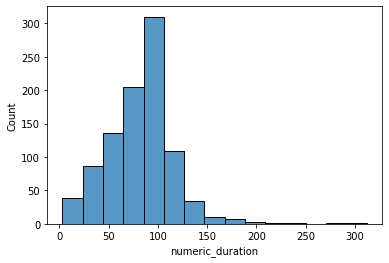

In [49]:
sns.histplot(df.numeric_duration, bins=15)
plt.show()

In [50]:
print(df_netflix[df_netflix['type'] == 'Movie'].shape)
print(df_netflix[(df_netflix['type'] == 'Movie') & (df_netflix['numeric_duration'] <= 10)].shape)

print(df.shape)
print(df[df['numeric_duration'] <= 10].shape)

(6131, 13)
(5, 13)
(946, 13)
(4, 13)


Se aprecia que en el catálogo de Netflix encontramos una menor cantidad de cortometrajes comparado con el de Disney Plus. Además de que estos registros no nos traen problemas ya que tienen la mayoría de sus campos.

# Problemas generales

1. En términos genenerales los problemas de ambos datasets giran en torno a valores nulos en los campos 'director', 'cast', 'country' y en menor medida 'date_added' y 'rating'.

2. Otro problema que tenemos en ambos datasets es el de los campos multivaluados en 'director', 'cast', 'country' y 'listed_in'.

3. El ratio de nulidad del campo 'director' presente en los shows tipo 'TV Show'. En el dataset de Disney+ todos los registros de éste tipo son nulos en dicho campo, mientras que en el de Netflix el ratio de nulidad es de más del 90%.

4. El campo 'duration' no está normalizado, está en min y seasons al tiempo

# Posibles soluciones

1. - La mejor solución que pude pensar fue la de utilizar los datos de una API para complementar los datos faltantes, ésta opción también nos daría el plus de poder agregar los campos de 'score' que usa Imdb, los premios que ganó la producción y demás info. Lamentablemente no pude realizar esta solución ya que el mejor API que encontré (el de Imdb) es de pago y las opciones gratuitas a este o fueron dadas de baja o tienen un threshold de calls muy bajo por lo que me toca proseguir con alguna de las otras opciones. Además de que en caso de tener que desarrollar un script que se conecte a la API e impute los valores faltantes no creo que alcanzaría a completar el challenge a tiempo.<br><br> - Otra opción que  descarto es la de dropear los valores nulos, por lo menos en ésta instancia, perdería muchos datos.<br><br> - Eso nos deja con la opción elegida, imputar los valores nulos con algún mensaje como 'Not specified' en un principio y luego analizar para casos puntuales alguna otra medida adicional.

2. Plantear relaciones de muchos a muchos.

3. Dependiendo nuestro modelo relacional podemos:<br><br> - Dropear la columna 'director' para los tipo 'TV Show.'<br><br> - Imputar los valores con un valor predeterminado como 'Not specified'

4. - Dropear la columna 'duration'. <br><br>- Plantear 2 tablas extras en el modelo: una tabla 'duration' y otra 'duration_type'. La primera tendrá el valor númerico y la segunda el tipo (min o season). <br><br> - Tratar 'movie' y 'TV_Show' como entidades distintas.

# Problemas específicos

1. Disney+: La cantidad de trailers, anuncios, especiales y cortometrajes que carecen de varios campos, sobre todo en los 3 primeros.

2. Netflix: Varios problemas de formato que fueron arreglados más arriba para proseguir con el análisis.

# Soluciones

1. Marcar como outliers los shows tipo 'Movie' que tengan una duración menor a X (a definir, probablemente entre 3-10) y una cantidad de nulos mayor a y (a definir también, probablemente entre 2-3)

2. Ya fueron arreglados, para tener en cuenta: Los CSV que usaré para la creación de los CSV a ingestar en la DB serán los que resulten de este notebook, no el descargado en un principio ya que ese no posee éstas correciones.

In [53]:
df_disney.to_csv('disney_plus_titles_fixed.csv', index=False, sep=';')

In [51]:
df_netflix.to_csv('netflix_titles_fixed.csv', index=False, sep=';')